<a href="https://colab.research.google.com/github/DataTak/study_deeplearning_fromscratch/blob/main/1~3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1장. 파이썬 기본

## 클래스

In [1]:
class Man:
    def __init__(self, name):
        self.name = name
        print("Initialized!")
    def hello(self):
        print("Hello " + self.name + "!")
    def goodbye(self):
        print("Good-bye " + self.name + "!")

In [2]:
m = Man("YoungTak")

Initialized!


In [3]:
m.hello()

Hello YoungTak!


In [4]:
m.goodbye()

Good-bye YoungTak!


## 넘파이

In [5]:
import numpy as np

In [6]:
x = np.array([1,2,3])
type(x)

numpy.ndarray

## matplotlib

In [7]:
import matplotlib.pyplot as plt

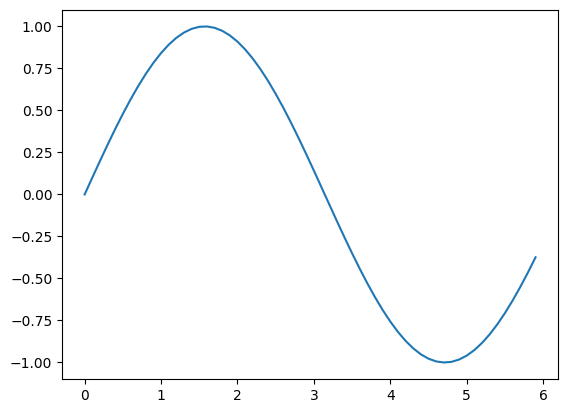

In [8]:
x = np.arange(0, 6, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

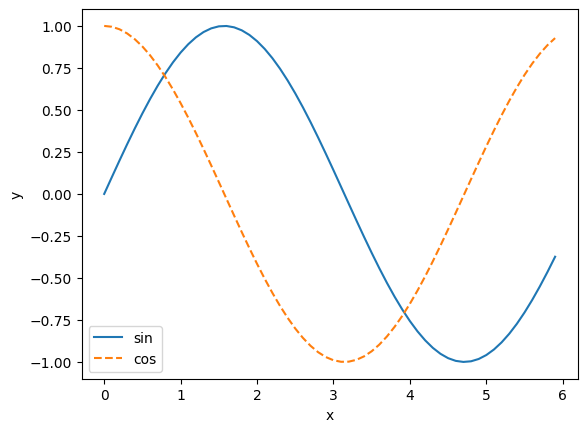

In [9]:
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle="--", label="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 2장. 퍼셉트론

## 가중치와 편향


In [10]:
import numpy as np
x = np.array([0,1])  #입력
w = np.array([0.5, 0.5])  #가중치
b = -0.7  #편향
w*x

array([0. , 0.5])

In [11]:
np.sum(w*x)

0.5

In [12]:
np.sum(w*x)+b

-0.19999999999999996

## 가중치와 편향을 도입한 AND 게이트

In [13]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [15]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [16]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

- 2장 정리
1. 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
2. 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
3. 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
4. XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
5. 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
6. 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
7. 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.


# 3장. 신경망

### 계단함수 구현

In [17]:
# 계단함수 구현
def step_function(x):
    y = x > 0
    return y.astype(np.int32)

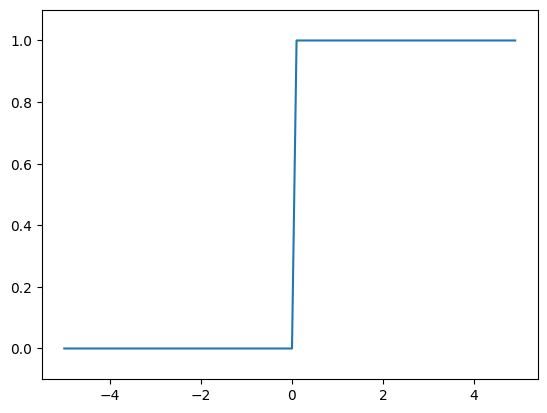

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수 구현

In [19]:
def sigmoid(X):
    return 1 / (1+np.exp(-X))

In [20]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

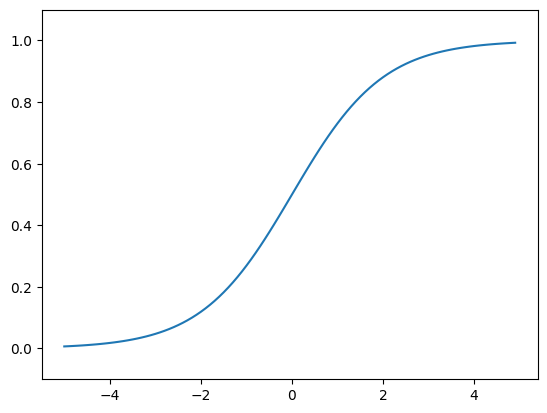

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### relu 함수 구현

In [22]:
def relu(x):
    return np.maximun(0, x)

In [23]:
def indentify_function(x):
    return x


### 신경망 구현 정리

In [24]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [25]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = indentify_function(a3)

    return y

In [26]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 소프트맥스함수


In [29]:
#소프트맥스함수
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [32]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [33]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [34]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

- 소프트맥스 함수는 오버플로의 문제가 있음.
    - 지수함수를 사용하는데 지수함수는 쉽게 아주 큰 값을 출력함.
    - 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해짐.


In [35]:
# 소프트맥스 함수 개선
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-35-2136d29c47dd>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-35-2136d29c47dd>:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

- 오버플로 문제로 제대로 계산되지 않는다.

In [36]:
c = np.max(a)
a-c

array([  0, -10, -20])

In [37]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [38]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [39]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [40]:
np.sum(y)

1.0

- 소프트맥스 함수의 출력은 0 ~ 1.0 사이의 실수. 출력의 총합은 1 => 확률로 해석
- 분류문제에서 확률 계산이 필요하면 소프트맥스 함수 적용. 아니라면 꼭 사용할 필요 없음.(지수 계산에 사용되는 컴퓨팅 자원 줄이는 방향으로.)

## 손글씨 숫자 인식(MNIST)

In [41]:
# 저자 깃 저장소 클론
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 853, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 853 (delta 9), reused 13 (delta 5), pack-reused 830 (from 1)
Receiving objects: 100% (853/853), 52.33 MiB | 32.05 MiB/s, done.
Resolving deltas: 100% (486/486), done.


In [43]:
import sys, os
sys.path.append("/content/deep-learning-from-scratch")  #불러온 깃 저장소를
from dataset.mnist import load_mnist

In [44]:
(x_train, y_train), (x_text, y_text) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_text.shape)
print(y_text.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [46]:
from PIL import Image

In [47]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [48]:
img = x_train[0]
label = y_train[0]
print(label)

5


In [52]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

(28, 28)
(28, 28)


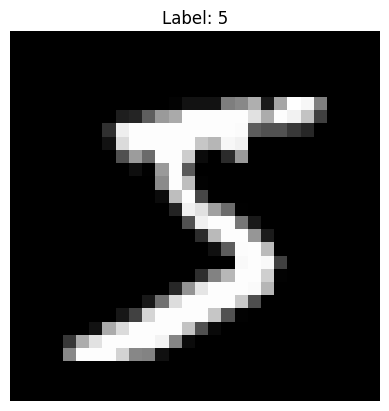

In [53]:
# 이미지 표시
plt.imshow(img, cmap='gray')
plt.title(f"Label: {label}")
plt.axis("off")  # 축 제거
plt.show()

### 신경망 구현
- 입력층 784개, 출력층 10개. (이미지 크기가 28*28 = 784, 출력층은 0~9 중에서 하나)

In [59]:
import pickle

In [55]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [60]:
def init_network():
    with open('/content/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [57]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [61]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 배치처리

In [65]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
x.shape

(10000, 784)

In [66]:
x[0].shape

(784,)

In [67]:
W1.shape

(784, 50)

In [68]:
W2.shape

(50, 100)

In [69]:
W3.shape

(100, 10)

- `X(784) W1(784x50) W2(50x100) W3(100x10) Y(10)`
    - 이미지 1장을 입력 했을 때의 처리 흐름

- 100장을 묶어서 한번에 처리한다면?
    - `X(100x784) W1(784x50) W2(50x100) W3(100x10) y(100x10)

- 위와 같이 하나로 묶은 입력 데이터를 배치(batch)라고 함.
- 배치는 곧 묶음. 이미지가 지폐처럼 다발로 묶여 있다고 생각하면 됨.
- 장점
    - 이미지 처리시간 대폭 줄여줌. (수치계산 라이브러리는 큰 배열을 효율적으로 처리할 수 있음.)
    - 큰 배열로 이뤄진 계산을 할 때 컴퓨터는 한번에 하는 것이 여러번 분할해서 하는 것 보다 더 빠름.
    

In [70]:
# 배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


## 3장 정리
- 신경망에서는 활성화 함수로 시그모이드 함수로 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제느 크게 회귀와 분류로 나눌 수 있다.
- 출력충의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.